In [404]:
# Load the required packages
library(ggplot2)
library(gridExtra)
library(caret)
library(tidyverse)
library(corrplot)
library(dplyr)
library(ggfortify)

# Import dataset as a csv file from GitHub
url <- "https://raw.githubusercontent.com/VSbr22/ADS503-Group-Project/main/sleep.csv"
sleep <- read.csv(url)

# View df header and dimensions
dim(sleep)
head(sleep)

# Display the Variable names, Data types, and Instance examples
str(sleep)

[1] 374  13

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


'data.frame':	374 obs. of  13 variables:
 $ Person.ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                 : chr  "Male" "Male" "Male" "Male" ...
 $ Age                    : int  27 28 28 28 28 28 29 29 29 29 ...
 $ Occupation             : chr  "Software Engineer" "Doctor" "Doctor" "Sales Representative" ...
 $ Sleep.Duration         : num  6.1 6.2 6.2 5.9 5.9 5.9 6.3 7.8 7.8 7.8 ...
 $ Quality.of.Sleep       : int  6 6 6 4 4 4 6 7 7 7 ...
 $ Physical.Activity.Level: int  42 60 60 30 30 30 40 75 75 75 ...
 $ Stress.Level           : int  6 8 8 8 8 8 7 6 6 6 ...
 $ BMI.Category           : chr  "Overweight" "Normal" "Normal" "Obese" ...
 $ Blood.Pressure         : chr  "126/83" "125/80" "125/80" "140/90" ...
 $ Heart.Rate             : int  77 75 75 85 85 85 82 70 70 70 ...
 $ Daily.Steps            : int  4200 10000 10000 3000 3000 3000 3500 8000 8000 8000 ...
 $ Sleep.Disorder         : chr  "None" "None" "None" "Sleep Apnea" ...


In [405]:
# Target Variable: Sleep Disorder

# (5)Numerical: age, sleep duration, physical activity level, heart rate, daily steps
# (2)Ordinal: quality of sleep, stress level
numerical_ordinal_predictors <- c("Age", "Sleep.Duration", "Physical.Activity.Level", "Heart.Rate", 
    "Daily.Steps", "Quality.of.Sleep", "Stress.Level")
# (5)Categorical: gender, occupation, !!!BMI category!!!, !!blood pressure(will convert to catgorical)!!
categorical_predictors <- c("Gender", "Occupation", "BMI.Category", "Blood.Pressure")

[1] "Age"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   35.25   43.00   42.18   50.00   59.00 
[1] "Sleep.Duration"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.800   6.400   7.200   7.132   7.800   8.500 
[1] "Physical.Activity.Level"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   45.00   60.00   59.17   75.00   90.00 
[1] "Heart.Rate"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   68.00   70.00   70.17   72.00   86.00 
[1] "Daily.Steps"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3000    5600    7000    6817    8000   10000 
[1] "Quality.of.Sleep"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   6.000   7.000   7.313   8.000   9.000 
[1] "Stress.Level"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   5.000   5.385   7.000   8.000 


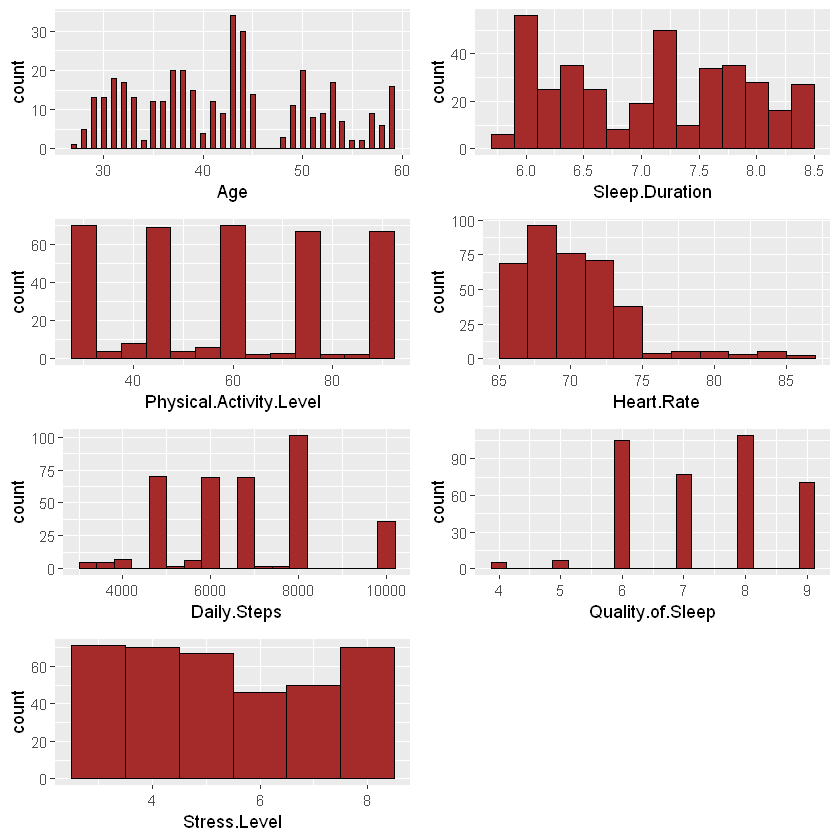

In [406]:
# Measures of Centrality & Histogram of Distribution for Numerical Predictors

# Create list to store each predictors histogram. Plots are graphed after for-loop. 
numerical_ordinal_plot_list <- list()

# Create Master list
master_plot_list <- list()

# Customize Bin Width for each Predictor
bin_width <- c(.5, .2, 5, 2, 400, .25, 1)

# For each predictor, print Measures of Centrality and add Histogram to the numerical_plot_list
for (i in 1:length(numerical_ordinal_predictors)) {
    
    # Print predicitor name then Measures of Centrality
    print(numerical_ordinal_predictors[i])
    print(summary(sleep[[numerical_ordinal_predictors[i]]]))
    
    # Create Histogram
    p <- ggplot(sleep, aes_string(x= numerical_ordinal_predictors[i])) + 
        geom_histogram(binwidth = bin_width[i] , fill = "brown", color = "black")
    
    # Add Historgram to List
    numerical_ordinal_plot_list[[i]] <- p
    master_plot_list[[i]] <- p
}

# Print all the histgrams in a more aesthetic way
grid.arrange(grobs = numerical_ordinal_plot_list, ncol = 2)

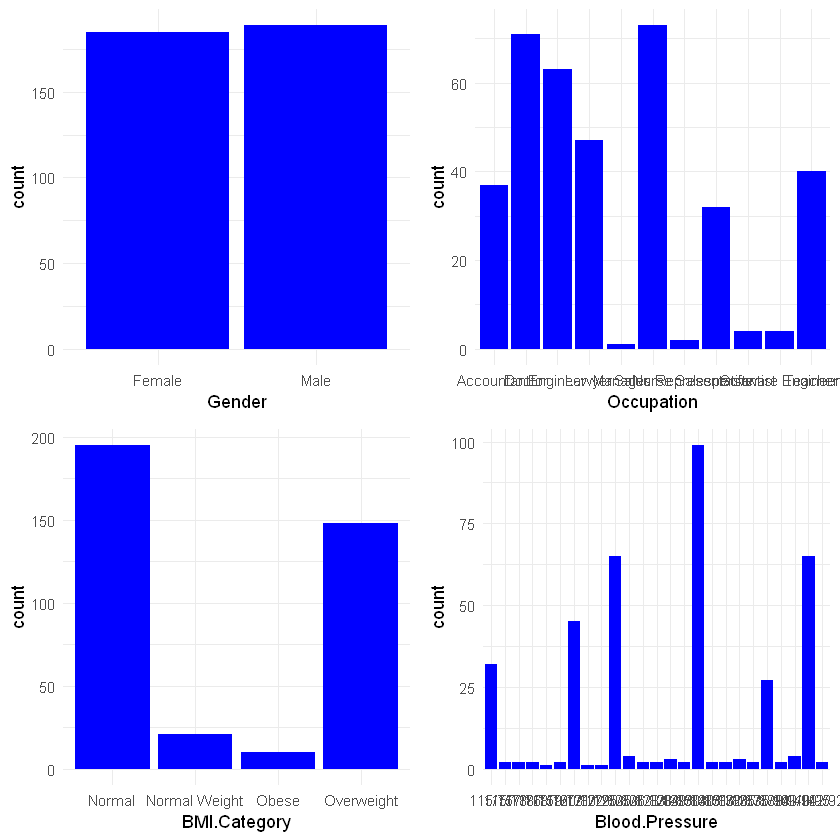

In [407]:
# Check for Class Imbalance in the Categorical Predictors

# Create list to store each predictors histogram. Plots are graphed after for-loop. 
categorical_plot_list <- list()

# For each specified column, create a bar plot
for (i in 1:length(categorical_predictors)) {
    p <- ggplot(sleep, aes_string(categorical_predictors[i])) + geom_bar(fill = "blue") + theme_minimal()
    g = i + length(numerical_ordinal_predictors)
    categorical_plot_list[[i]] <- p
    master_plot_list[[g]] <- p
}

# Print only the barplots
grid.arrange(grobs = categorical_plot_list, ncol = 2)

# Print the Master Plot list with both Histograms & Bar Plots.
#grid.arrange(grobs = master_plot_list, ncol = 2)


   Insomnia        None Sleep Apnea 
         77         219          78 

   Insomnia        None Sleep Apnea 
  0.2058824   0.5855615   0.2085561 


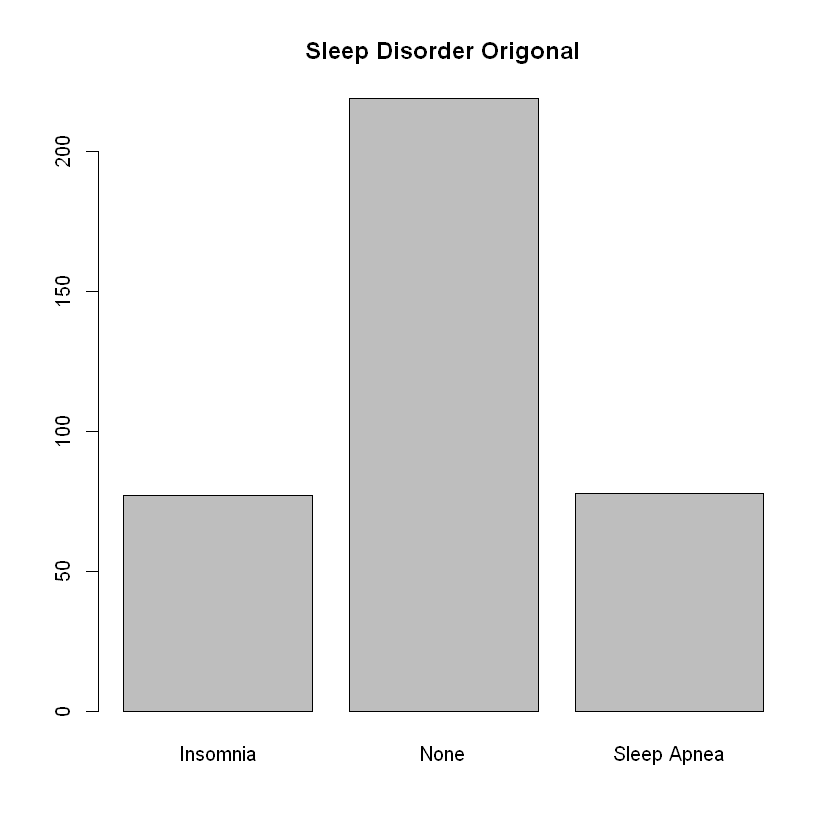

In [408]:
# Check for Class Imbalance in the Target Variable 

# Class Counts
class_counts <- table(sleep$Sleep.Disorder)
print(class_counts)

# Class Percentages
class_prop <- prop.table(class_counts)
print(class_prop)

# Class Barchart
barplot(class_counts, main = "Sleep Disorder Origonal")

# There is class imbalance with the Target Varibale Sleep.Disorder - None being higher than both sleep apnea and insomnia.
# Stratified Sampling will be used to ensure equal class ditrobution in both testing and training sets

In [409]:
# Turn Target Variable into Binary

Sleep.Disorder.Binary = as.character(sleep$Sleep.Disorder)
Sleep.Disorder.Binary[Sleep.Disorder.Binary=="Insomnia" ] = "Yes"
Sleep.Disorder.Binary[Sleep.Disorder.Binary=="Sleep Apnea" ] = "Yes"
Sleep.Disorder.Binary[Sleep.Disorder.Binary=="None" ] = "No"
Sleep.Disorder.Binary = factor(Sleep.Disorder.Binary, levels=c("Yes","No") )
sleep <- cbind(sleep, Sleep.Disorder.Binary)

head(sleep)

,Person.ID,Gender,Age,Occupation,Sleep.Duration,Quality.of.Sleep,Physical.Activity.Level,Stress.Level,BMI.Category,Blood.Pressure,Heart.Rate,Daily.Steps,Sleep.Disorder,Sleep.Disorder.Binary
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<fct>
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,No
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,No
3,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,No
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes
5,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes
6,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,Yes


In [410]:
# To Drop Columns in needed
sleep <- sleep %>% select(-Sleep.Disorder)
#head(sleep, n=3)

[1] 263  13

[1] 111  13

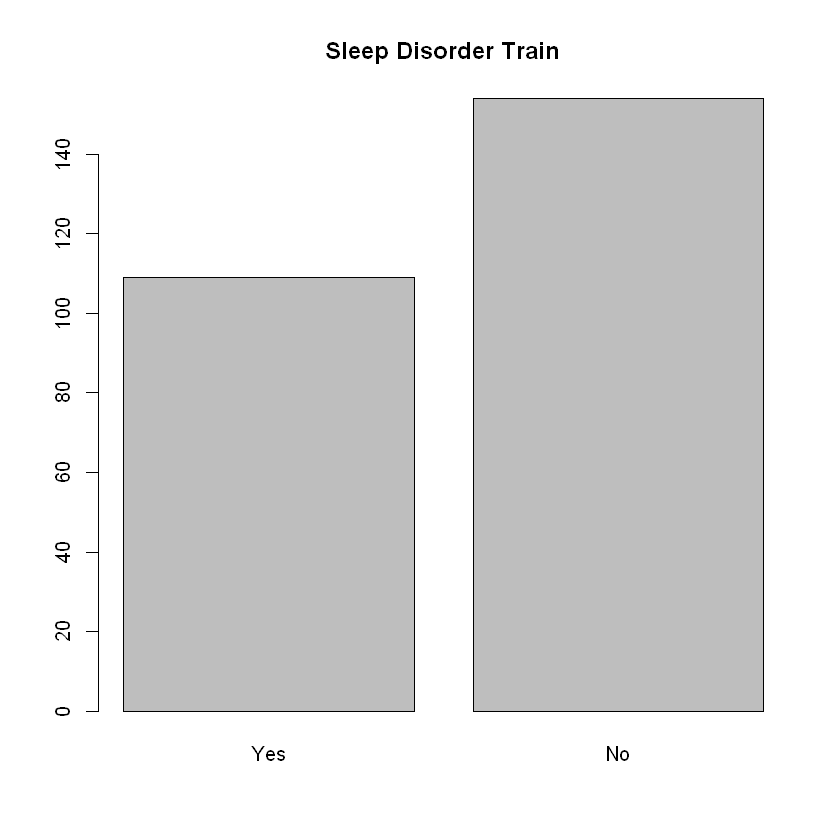

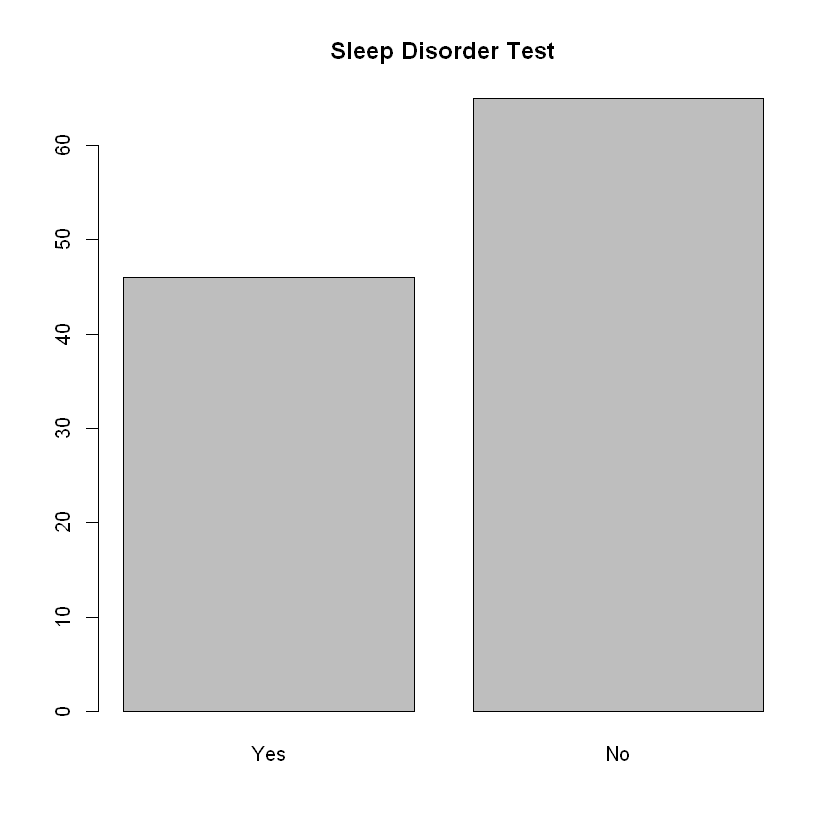

In [411]:
# Create Test and Train Partitions with balanced Sleep.Disorder classes

# Set Seed for Repitition
set.seed(13)

# Seperate Dependent and Independnet Variables
x <- sleep[, -13]
y <- sleep$Sleep.Disorder

# Perform data partition
split_strat <- createDataPartition(y = sleep$Sleep.Disorder, p = 0.7, list = FALSE)

# Split into testing and training sets. Show new dimensions
train <- sleep[split_strat, ]
test <- sleep[-split_strat, ]
dim(train)
dim(test)

# Check for equal class ditrobution of Target variable in both testing and training sets
# Bar Plots of Sleep.Disorder class distrobution for both Test and Train
train_plot <- barplot(table(train$Sleep.Disorder), main = "Sleep Disorder Train")
test_plot <- barplot(table(test$Sleep.Disorder), main = "Sleep Disorder Test")

In [412]:
# Feature Transformations

# Drop Person.ID because it is meaningless for the dataset
train$Person.ID <- NULL
test$Person.ID <- NULL

# Create two new columns for Blood pressure
train <- train %>% separate(Blood.Pressure, into = c("Systolic", "Diastolic"), sep = "/", convert = TRUE)
test <- test %>% separate(Blood.Pressure, into = c("Systolic", "Diastolic"), sep = "/", convert = TRUE)

# make them numeric 
train$Systolic <- as.numeric(train$Systolic)
train$Diastolic <- as.numeric(train$Diastolic)
test$Systolic <- as.numeric(test$Systolic)
test$Diastolic <- as.numeric(test$Diastolic)

In [413]:
# Binning Predictors
# If your data follows a certain distribution, choose a discretization method that aligns with that distribution.
# Categorizing a cont outcome can have detrimental impacts on model performance especially when the distribution does not have distinct groupings.

# Perform K-means Disrimitization on the Systolic variable
# Fit the k-means to the training data and then apply the same binning to the test data.
#km_res <- kmeans(train$Systolic, centers = 3)

# Add the result to your data frame as a new column
#train <- train %>% mutate(Systolic_New = km_res$cluster)
#test <- test %>% mutate(Systolic_New = km_res$cluster)

# Remove the 'Systolic' column
#train <- train %>% select(-Systolic)
#test <- test %>% select(-Systolic)

# Print the updated dataframe
#head(train, n=3)

In [414]:
# Create dummy variables for the 3 Categorical Predictors: Gender, Occupation, BMI.Category & the Target Variable: Sleep.Disorder

# Training Set 
dummy <- dummyVars(" ~ .", data = train)
trsf <- data.frame(predict(dummy, newdata = train))
train <- trsf

# Test Set
dmy <- dummyVars(" ~ .", data = test)
tran <- data.frame(predict(dmy, newdata = test))
test <- tran

# Training and test sets end up with different numbers of columns after creating dummy variables.
# There are categorical variables that have unique values which are are not represented in both sets 
# The training set has three categories that do not appear in the test set. 
# 'OccupationManager', 'OccupationSales.Representative', 'BMI.CategoryObese'
print(ncol(train) - ncol(test))

# Find columns in train but not in test
missing_cols <- setdiff(names(train), names(test))
missing_cols

# Add missing columns to test and fill in all rows with 0
for (col in missing_cols){
  test[[col]] <- 0
}

# Rearrange columns in test to match train
test <- test[, names(train)]

# Make sure there are equal columns
print(ncol(train) - ncol(test))

# Make sure they are in the same order
head(train, n=3)
head(test, n=3)

[1] 1


[1] "OccupationManager"

[1] 0


,GenderFemale,GenderMale,Age,OccupationAccountant,OccupationDoctor,OccupationEngineer,OccupationLawyer,OccupationManager,OccupationNurse,OccupationSales.Representative,⋯,BMI.CategoryNormal,BMI.CategoryNormal.Weight,BMI.CategoryObese,BMI.CategoryOverweight,Systolic,Diastolic,Heart.Rate,Daily.Steps,Sleep.Disorder.Binary.Yes,Sleep.Disorder.Binary.No
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,27,0,0,0,0,0,0,0,⋯,0,0,0,1,126,83,77,4200,0,1
2,0,1,28,0,1,0,0,0,0,0,⋯,1,0,0,0,125,80,75,10000,0,1
3,0,1,28,0,1,0,0,0,0,0,⋯,1,0,0,0,125,80,75,10000,0,1


,GenderFemale,GenderMale,Age,OccupationAccountant,OccupationDoctor,OccupationEngineer,OccupationLawyer,OccupationManager,OccupationNurse,OccupationSales.Representative,⋯,BMI.CategoryNormal,BMI.CategoryNormal.Weight,BMI.CategoryObese,BMI.CategoryOverweight,Systolic,Diastolic,Heart.Rate,Daily.Steps,Sleep.Disorder.Binary.Yes,Sleep.Disorder.Binary.No
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0,1,28,0,0,0,0,0,0,1,⋯,0,0,1,0,140,90,85,3000,1,0
7,0,1,29,0,0,0,0,0,0,0,⋯,0,0,1,0,140,90,82,3500,1,0
8,0,1,29,0,1,0,0,0,0,0,⋯,1,0,0,0,120,80,70,8000,0,1


In [415]:
# Preprocessing
# Center and Scale the values in both Traing and Test sets to prepare for modeling. 

y_train <- train$Sleep.Disorder.Binary.Yes
y_test <- test$Sleep.Disorder.Binary.Yes

train <- train %>% select(-Sleep.Disorder.Binary.Yes)
train <- train %>% select(-Sleep.Disorder.Binary.No)
test <- test %>% select(-Sleep.Disorder.Binary.Yes)
test <- test %>% select(-Sleep.Disorder.Binary.No)


# Test
preProcValues <- preProcess(train, method = c("center", "scale"))
X_train_tran <- predict(preProcValues, train)

# Train
preProcValues_test <- preProcess(test, method = c("center", "scale"))
X_test_tran <- predict(preProcValues_test, test)

Warning message in preProcess.default(test, method = c("center", "scale")):
"These variables have zero variances: OccupationManager"


In [416]:
# Check for Multicollinearity

# Correlation matrix
correlation_matrix <- cor(X_train_tran)
#print(correlation_matrix)

# Correlation matrix with Threshold
threshold <- 0.5 
correlation_matrix_threshold <- correlation_matrix
correlation_matrix_threshold[abs(correlation_matrix) < threshold] <- 0
#print(correlation_matrix_threshold)

# Based on the correlation matrix it is possible that sleep duration and sleep quality are going to potentially give problems. 
# Intutively they are basically the same, sleep quality should go up as sleep duration also goes up. 
# More sleep is good.

                               GenderFemale GenderMale        Age
GenderFemale                      1.0000000 -1.0000000  0.6090367
GenderMale                       -1.0000000  1.0000000 -0.6090367
Age                               0.6090367 -0.6090367  1.0000000
OccupationAccountant              0.0000000  0.0000000  0.0000000
OccupationDoctor                  0.0000000  0.0000000 -0.5846999
OccupationEngineer                0.0000000  0.0000000  0.0000000
OccupationLawyer                  0.0000000  0.0000000  0.0000000
OccupationManager                 0.0000000  0.0000000  0.0000000
OccupationNurse                   0.5045360 -0.5045360  0.5616019
OccupationSales.Representative    0.0000000  0.0000000  0.0000000
OccupationSalesperson             0.0000000  0.0000000  0.0000000
OccupationScientist               0.0000000  0.0000000  0.0000000
OccupationSoftware.Engineer       0.0000000  0.0000000  0.0000000
OccupationTeacher                 0.0000000  0.0000000  0.0000000
Sleep.Dura

In [417]:
# Feature Reduction
# Remove Near-zero Variance Predicors

# Find all Zero Varience Predicitors in the Training Set 
zero_var_indices <- nearZeroVar(X_train_tran)
zv <- names(X_train_tran)[zero_var_indices]
print("Zero Varience Training Predicitors:")
print(zv)

# Remove these Predictors from Training and Testing
# Remove the same zero-varience predictors in the test set from both the testing and training sets
# (5)Features total
X_train <- X_train_tran[,-zero_var_indices]
X_test <- X_test_tran[,-zero_var_indices]

[1] "Zero Varience Training Predicitors:"
[1] "OccupationManager"              "OccupationSales.Representative"
[3] "OccupationScientist"            "OccupationSoftware.Engineer"   
[5] "BMI.CategoryObese"             


In [418]:
X_train <- cbind(X_train, y_train)
X_test <- cbind(X_test, y_test)
head(X_train)
head(X_test)

,GenderFemale,GenderMale,Age,OccupationAccountant,OccupationDoctor,OccupationEngineer,OccupationLawyer,OccupationNurse,OccupationSalesperson,OccupationTeacher,⋯,Physical.Activity.Level,Stress.Level,BMI.CategoryNormal,BMI.CategoryNormal.Weight,BMI.CategoryOverweight,Systolic,Diastolic,Heart.Rate,Daily.Steps,y_train
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.017256,1.017256,-1.712810,-0.364846,-0.4954881,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,-0.83993421,0.3192027,-1.0648397,-0.2454667,1.2439822,-0.3134859,-0.2572681,1.81189206,-1.6611328,0
2,-1.017256,1.017256,-1.600614,-0.364846,2.0105382,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,0.02862161,1.4385400,0.9355377,-0.2454667,-0.8008135,-0.4413104,-0.7360052,1.29024169,1.9690850,0
3,-1.017256,1.017256,-1.600614,-0.364846,2.0105382,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,0.02862161,1.4385400,0.9355377,-0.2454667,-0.8008135,-0.4413104,-0.7360052,1.29024169,1.9690850,0
4,-1.017256,1.017256,-1.600614,-0.364846,-0.4954881,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,-1.41897143,1.4385400,-1.0648397,-0.2454667,-0.8008135,1.4760569,0.8597852,3.89849353,-2.4122124,1
6,-1.017256,1.017256,-1.600614,-0.364846,-0.4954881,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,-1.41897143,1.4385400,-1.0648397,-0.2454667,-0.8008135,1.4760569,0.8597852,3.89849353,-2.4122124,1
9,-1.017256,1.017256,-1.488417,-0.364846,2.0105382,-0.4227176,-0.3780644,-0.5132423,-0.3089805,-0.3015613,⋯,0.75241813,0.3192027,0.9355377,-0.2454667,-0.8008135,-1.0804328,-0.7360052,-0.01388423,0.7172857,0


,GenderFemale,GenderMale,Age,OccupationAccountant,OccupationDoctor,OccupationEngineer,OccupationLawyer,OccupationNurse,OccupationSalesperson,OccupationTeacher,⋯,Physical.Activity.Level,Stress.Level,BMI.CategoryNormal,BMI.CategoryNormal.Weight,BMI.CategoryOverweight,Systolic,Diastolic,Heart.Rate,Daily.Steps,y_test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,-0.9177921,0.9177921,-1.724669,-0.2379665,-0.4523949,-0.5089293,-0.3781926,-0.4379551,-0.2957032,-0.4379551,⋯,-1.3518416,1.5559281,-0.986557,-0.2379665,-0.8219949,1.475256,0.8868514,3.04523485,-2.2343298,1
7,-0.9177921,0.9177921,-1.601399,-0.2379665,-0.4523949,-0.5089293,-0.3781926,-0.4379551,-0.2957032,2.2627682,⋯,-0.8793781,0.9840473,-0.986557,-0.2379665,-0.8219949,1.475256,0.8868514,2.41810857,-1.9347277,1
8,-0.9177921,0.9177921,-1.601399,-0.2379665,2.1905439,-0.5089293,-0.3781926,-0.4379551,-0.2957032,-0.4379551,⋯,0.7742443,0.4121664,1.004494,-0.2379665,-0.8219949,-1.157435,-0.7987737,-0.09039658,0.7616911,0
12,-0.9177921,0.9177921,-1.601399,-0.2379665,2.1905439,-0.5089293,-0.3781926,-0.4379551,-0.2957032,-0.4379551,⋯,0.7742443,0.4121664,1.004494,-0.2379665,-0.8219949,-1.157435,-0.7987737,-0.09039658,0.7616911,0
14,-0.9177921,0.9177921,-1.601399,-0.2379665,2.1905439,-0.5089293,-0.3781926,-0.4379551,-0.2957032,-0.4379551,⋯,-1.3518416,1.5559281,1.004494,-0.2379665,-0.8219949,-1.157435,-0.7987737,-0.09039658,0.7616911,0
24,-0.9177921,0.9177921,-1.478129,-0.2379665,2.1905439,-0.5089293,-0.3781926,-0.4379551,-0.2957032,-0.4379551,⋯,0.7742443,0.4121664,1.004494,-0.2379665,-0.8219949,-1.157435,-0.7987737,-0.09039658,0.7616911,0


[1] 2.690066e+01 2.183828e+01 1.173708e+01 9.239601e+00 6.302815e+00
 [6] 5.920559e+00 5.227712e+00 3.842696e+00 3.191524e+00 1.873631e+00
[11] 1.215090e+00 9.425824e-01 5.314962e-01 3.127628e-01 2.874392e-01
[16] 2.392671e-01 1.942445e-01 8.768064e-02 6.733764e-02 3.158080e-02
[21] 1.596982e-02 3.147711e-29

ERROR: Error in predict.prcomp(pca_train, newdata = train): 'newdata' does not have named columns matching one or more of the original columns


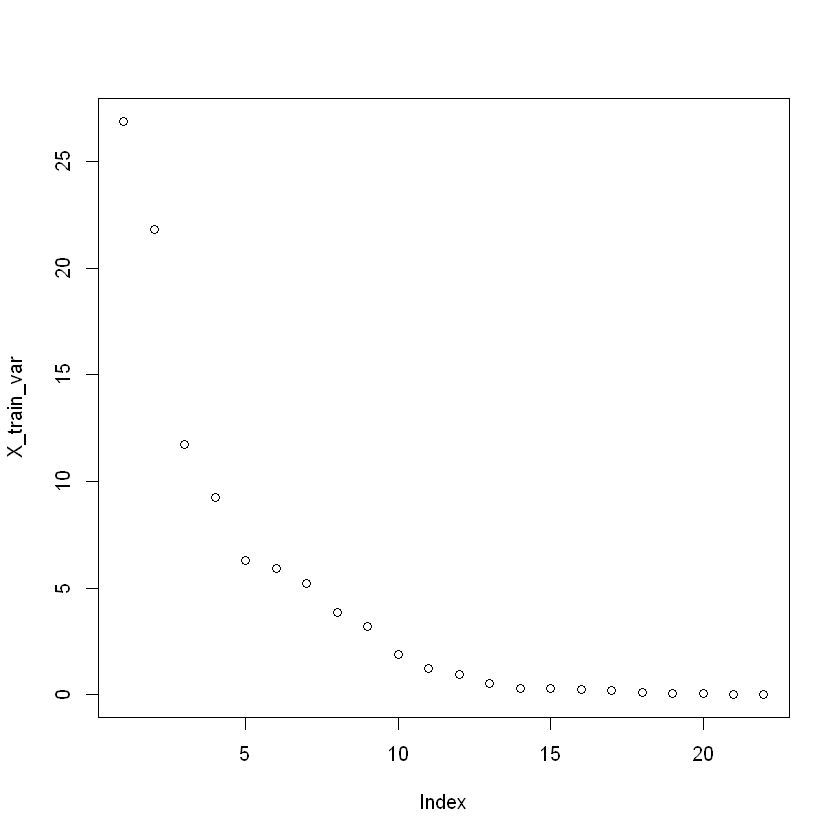

In [419]:
# Feature Reduction
# Run PCA on training set
pca_train <- prcomp(X_train)
X_train_var <- (pca_train$sdev)^2*100/sum((pca_train$sdev)^2)
X_train_var

# Plot the variance explained by each principal component
plot(X_train_var)

# Apply the transformation to both the training and test sets
pca_train_data <- predict(pca_train, newdata = train)
pca_test_data <- predict(pca_train, newdata = test)

# PLot Predictors
#boxplot(X_train)
#boxplot(X_test)

# Modeling

In [420]:
# Define the target variable and set as factor. Isolate the target variable for testing later
target_variable_train <- "y_train"
target_variable_test <- "y_test"
y_train <- as.factor(y_train)
y_test <- as.factor(y_test)
X_train[[target_variable_train]] <- as.factor(X_train[[target_variable_train]])
X_test[[target_variable_test]] <- as.factor(X_test[[target_variable_test]])

## Random Forest - 0.9279
### It's an ensemble method therefor the final prediction is the average of a handful of unique smaller models. This is achieved by breaking the data into unqiue subsections and training a decision tree model on each of these unique subsections - train model on 2 random features and 10 random instances, then train model on 4 random features and 3 random instances, and so forth using other resmapling techniques. The final predcition is the ensemble of all the individual guesses; use mean if the target variable is continuous or use mode if the target variable is categorical. 

### Hyperparameters: # of trees, # of predictors considered at each split, and tree depth.
### Scalability: It can handle moderate-sized datasets and scales well with the number of trees.


## Data Structure: data frame
## Target Variable Type: convert to factor

In [421]:
set.seed(123)
library(randomForest)

# Random Forest
rf_model <- train(y_train ~ ., data = X_train, method = "rf", 
    trControl = trainControl(method = "cv", number = 5), ntree = 100)

rf_pred <- predict(rf_model, newdata = X_test[-22])
rf_cm <- confusionMatrix(rf_pred, y_test)
rf_cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 61  4
         1  4 42
                                          
               Accuracy : 0.9279          
                 95% CI : (0.8629, 0.9684)
    No Information Rate : 0.5856          
    P-Value [Acc > NIR] : 4.959e-16       
                                          
                  Kappa : 0.8515          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9385          
            Specificity : 0.9130          
         Pos Pred Value : 0.9385          
         Neg Pred Value : 0.9130          
             Prevalence : 0.5856          
         Detection Rate : 0.5495          
   Detection Prevalence : 0.5856          
      Balanced Accuracy : 0.9258          
                                          
       'Positive' Class : 0               
                                    

## Bagged ADA Boost - 0.9099

### An ensemble method which aggregates the predictions of models which are iteratively improved therough a technique called boosting. At each iteration in the training process, the instances that were falsely classified are given more weight. In consequence (or as a reward in this case), the hardest instances to predict will have greater effect on the model's decisions. The final prediction is the most voted on class.

### Hyperparameters: learning rate, # of trees, tree depth, and regularization parameters.
### Scalability: It can handle moderate-sized datasets efficiently. Can be computationally intensive, especially when # of iterations (boosting rounds) is high.

## Data Structure: data frame
## Target Variable Type: convert to factor

In [422]:
set.seed(123)
library(adabag)

# Bagged AdaBoost
bag_model <- boosting(y_train ~ ., data = X_train, boos=TRUE)

# Predict using Bagged AdaBoost model
bag_pred <- predict(bag_model, newdata = X_test[-22])
bag_predict <- bag_pred$class
bag_predict <- as.factor(bag_predict)

#Calculate model statistics for Bagged AdaBoost
bag_cm <- confusionMatrix(bag_predict, y_test)
bag_cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 59  4
         1  6 42
                                          
               Accuracy : 0.9099          
                 95% CI : (0.8406, 0.9559)
    No Information Rate : 0.5856          
    P-Value [Acc > NIR] : 2.997e-14       
                                          
                  Kappa : 0.8156          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.9077          
            Specificity : 0.9130          
         Pos Pred Value : 0.9365          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5856          
         Detection Rate : 0.5315          
   Detection Prevalence : 0.5676          
      Balanced Accuracy : 0.9104          
                                          
       'Positive' Class : 0               
                                    

## XGBoost - Accuracy 0.9279

### Also an emsemble method that works by using gradient descent to minimize a selected loss function. The loss function uses both calssification error from each indivisdaul tree(like AdaBoost), BUT also considers the complexity of the overall model (number of trees, size of the trees). Additionally, it automatically handles the following: outliers(L1 and L2 regularization which is lasso and ridge respectively) and implements cross-validation at each iteration.

### Hyperparameters: # of iterations (boosting rounds) and the learning rate.
### Scalability: It can handle large datasets and is optimized for both training and prediction speed.

## Data Structure: data frame with target variable removed
## Target Variable Type: binary vector

In [423]:
set.seed(123)
library(xgboost)

# Convert the data into xgb.DMatrix
dtrain <- xgb.DMatrix(data = as.matrix(X_train[, -ncol(X_train)]), label = as.matrix(X_train[, ncol(X_train)]))

# Set parameters
params <- list(objective = "binary:logistic",eta = 0.3,max_depth = 6,eval_metric = "error")

# Train the model
xg_model <- xgb.train(params = params,data = dtrain,nrounds = 50)

# Create DMatrix for test data
dtest <- xgb.DMatrix(data = as.matrix(X_test[, -ncol(X_test)]), label = as.matrix(X_test[, ncol(X_test)]))

# Make predictions
xg_pred <- predict(xg_model, newdata = dtest)

# Apply rounding function
xg_pred <- ifelse(xg_pred >= 0.5, 1, 0)
xg_pred <- as.factor(xg_pred)

#Calculate model statistics for Bagged AdaBoost
xg_cm <- confusionMatrix(xg_pred, y_test)
xg_cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 61  4
         1  4 42
                                          
               Accuracy : 0.9279          
                 95% CI : (0.8629, 0.9684)
    No Information Rate : 0.5856          
    P-Value [Acc > NIR] : 4.959e-16       
                                          
                  Kappa : 0.8515          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9385          
            Specificity : 0.9130          
         Pos Pred Value : 0.9385          
         Neg Pred Value : 0.9130          
             Prevalence : 0.5856          
         Detection Rate : 0.5495          
   Detection Prevalence : 0.5856          
      Balanced Accuracy : 0.9258          
                                          
       'Positive' Class : 0               
                                    